In [ ]:
import pandas as pd
import time
import matplotlib as plt
import math
import warnings
from collections import Counter
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing dataset from Google drive to Colab

In [ ]:
### Mount google drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Function Definitions

### 1) Function to drop empty columns

In [ ]:
def drop_cols(X):
  pct_null = X.isnull().sum() / len(X)
  missing_features = pct_null[pct_null > 0.70].index
  X.drop(missing_features, axis=1, inplace=True)
  return X

### 2) Function to convert epoch time to datetime format 


In [ ]:
def time_converter(X):
  X.ts = X.ts.astype(float).astype("datetime64[s]")
  return X

### 3) Function to rearrange the columns of the dataset

In [ ]:
def shift_colnames(x):
  colnames = list(x.columns)
  colnames.append('Garbage')
  x.columns = colnames[1:]
  x = x.drop('Garbage', axis=1)
  x = x[:-1]
  return x

### 4) Functions to find missing values

In [ ]:
def find_missing_values(X):
  print(X.isnull().sum()/len(X)*100)



##5) Function to calculate accuracy

In [ ]:
# Function to calculate accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("\nAccuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\nReport : \n", 
    classification_report(y_test, y_pred))

# Working with file_1_1_hideNseek

In [ ]:
mc_1_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_1_1_HideNSeek.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning & Transformation

In [ ]:
#Rearranging the columns
mc_1_1 = shift_colnames(mc_1_1)

# Converting epoch time to normal timestamp
mc_1_1 = time_converter(mc_1_1)

# Replacing NA with Benign in last column
mc_1_1["detailed-label"] = mc_1_1["detailed-label"].fillna("Benign")

In [ ]:
print(mc_1_1.groupby('detailed-label'))

In [ ]:
mc_1_1['detailed-label'].value_counts()

PartOfAHorizontalPortScan    539465
Benign                       469275
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
# Looking at the dataset
print(mc_1_1.head(5))
print(mc_1_1.tail(5))
print(mc_1_1.shape)
print(mc_1_1.columns)

                   ts                 uid  ...      label             detailed-label
0 2018-05-09 15:30:31  CUmrqr4svHuSXJy5z7  ...  Malicious  PartOfAHorizontalPortScan
1 2018-05-09 15:30:31  CH98aB3s1kJeq6SFOc  ...  Malicious  PartOfAHorizontalPortScan
2 2018-05-09 15:30:31   C3GBTkINvXNjVGtN5  ...  Malicious  PartOfAHorizontalPortScan
3 2018-05-09 15:30:32   CDe43c1PtgynajGI6  ...  Malicious  PartOfAHorizontalPortScan
4 2018-05-09 15:30:32  CJaDcG3MZzvf1YVYI4  ...  Malicious  PartOfAHorizontalPortScan

[5 rows x 23 columns]
                         ts                 uid  ...   label  detailed-label
1008743 2018-05-14 07:24:15   CUyBg1WA04SBmf3ah  ...  Benign          Benign
1008744 2018-05-14 07:24:42  CvaIoX2b9VynuYieBf  ...  Benign          Benign
1008745 2018-05-14 07:23:45   CVHrUzIUN0mW5lQsl  ...  Benign          Benign
1008746 2018-05-14 07:24:36  CkGlnL2pxzlusrFlLj  ...  Benign          Benign
1008747 2018-05-14 07:24:20  CoOjVZ1zw3pWf7a9n5  ...  Benign          Benign

[5 r

## Missing Value Analysis

In [ ]:
# Proportion of Missing Value
find_missing_values(mc_1_1)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.678711
duration           78.939438
orig_bytes         78.939438
resp_bytes         78.939438
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             1.726992
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label      0.000000
dtype: float64


In [ ]:
# Imputing Duration variable with median
mc_1_1.duration = mc_1_1.duration.fillna(mc_1_1.duration.median())

In [ ]:
#Drop the columns having missing values more than 70%
mc_1_1 = drop_cols(mc_1_1)

In [ ]:
# Deleting the rows with missing values
mc_1_1.dropna(subset = ["history"], inplace=True)
mc_1_1.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                float64
id.resp_h                 object
id.resp_p                float64
proto                     object
duration                 float64
conn_state                object
missed_bytes             float64
history                   object
orig_pkts                float64
orig_ip_bytes            float64
resp_pkts                float64
resp_ip_bytes            float64
label                     object
detailed-label            object
dtype: object

## Exploratory Data Analysis

In [ ]:
# Data Description
mc_1_1.describe()

,id.orig_p,id.resp_p,duration,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,991327.00000,991327.000000,991327.000000,991327.0,991327.000000,991327.000000,991327.000000,991327.000000
mean,45217.67372,16380.544906,3.021689,0.0,1.501162,81.063295,0.144966,9.208039
std,7724.18947,19616.223407,1.513674,0.0,1.752704,95.053551,1.866504,120.718387
min,23.00000,1.000000,0.000250,0.0,0.000000,0.000000,0.000000,0.000000
25%,43763.00000,23.000000,2.998797,0.0,1.000000,40.000000,0.000000,0.000000
50%,43763.00000,8080.000000,2.998797,0.0,1.000000,60.000000,0.000000,0.000000
75%,49023.00000,28802.000000,2.998797,0.0,1.000000,60.000000,0.000000,0.000000
max,65394.00000,65535.000000,245.999785,0.0,60.000000,2990.000000,75.000000,9415.000000


### Analysing Time Dependency

ts
2018-05-09 15:00:00    4696
2018-05-09 16:00:00    9511
2018-05-09 17:00:00    9489
2018-05-09 18:00:00    9649
2018-05-09 19:00:00    9492
                       ... 
2018-05-14 03:00:00    8343
2018-05-14 04:00:00    8337
2018-05-14 05:00:00    8330
2018-05-14 06:00:00    8347
2018-05-14 07:00:00    3425
Freq: H, Name: uid, Length: 113, dtype: int64


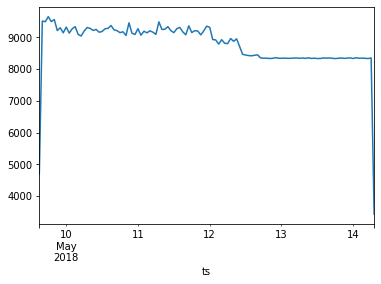

In [ ]:
print(mc_1_1.resample('1H', on='ts').uid.count())
mc_1_1.resample('1H', on='ts').uid.count().plot()


### Analysing Distribution of Categorical Features

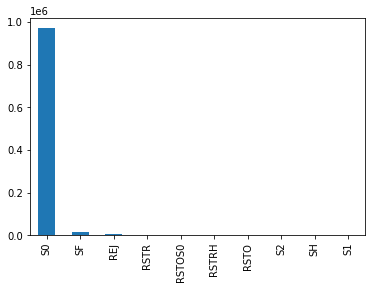

In [ ]:
mc_1_1['conn_state'].value_counts().plot(kind='bar')

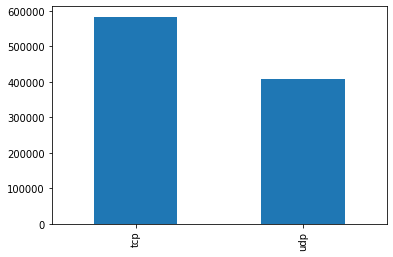

In [ ]:
mc_1_1['proto'].value_counts().plot(kind='bar')

### Correlation Plot

In [ ]:
corr_matrix = mc_1_1.corr()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,id.orig_p,id.resp_p,duration,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.orig_p,1.000000,-0.095220,0.051748,nan,0.064932,0.076316,0.001706,-0.002579
id.resp_p,-0.095220,1.000000,-0.014573,nan,-0.173844,-0.255172,-0.059751,-0.058733
duration,0.051748,-0.014573,1.000000,nan,0.416034,0.376973,0.399852,0.384974
missed_bytes,nan,nan,nan,nan,nan,nan,nan,nan
orig_pkts,0.064932,-0.173844,0.416034,nan,1.000000,0.984111,0.859620,0.828501
orig_ip_bytes,0.076316,-0.255172,0.376973,nan,0.984111,1.000000,0.788439,0.766091
resp_pkts,0.001706,-0.059751,0.399852,nan,0.859620,0.788439,1.000000,0.958293
resp_ip_bytes,-0.002579,-0.058733,0.384974,nan,0.828501,0.766091,0.958293,1.000000


## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars = final_mc_1_1.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False  True  True  True  True  True  True False False  True
 False  True False  True False False  True False False False False False
 False  True  True False False False False False  True  True False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False  True]
[ 69  71  68   1   1   1   1   1   1  36  26   1   5   1  55   1  67  20
   1  23  61 115  10 110  13   1   1   7  12 117  31  11   1   1   2 107
  48  32  81  50  4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [ ]:
alpha=X_train.columns


In [ ]:
alpha[[False, False, False,  True,  True,  True,  True,  True,  True, False, False,  True,
 False,  True, False,  True, False, False,  True, False, False, False, False, False,
 False,  True,  True, False, False, False, False, False,  True,  True, False, False,
 False, False, False, False, False, False, False, False,  True, False,  True, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False,  True,
 False, False, False, False, False, False, False, False,  True, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False,  True, False, False, False, False,
 False, False, False, False,  True]]

Index(['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'],
      dtype='object')

In [ ]:
z = y_train
print(z.columns.values)

['label']


In [ ]:
cols=['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'] 
X = pd.DataFrame(X_train[cols])
y = pd.DataFrame(z)

In [ ]:
print(y.shape)
print(X.shape)
print(y.dtypes)
print(X.dtypes)

In [ ]:
correlated_features = set()
correlation_matrix = X.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

5

## Model Building

In [ ]:
# Keeping the selected columns
final_mc_1_1 = mc_1_1[['proto','duration','conn_state','history','orig_ip_bytes','resp_ip_bytes','label']]

In [ ]:
print("No. of Unique values in variable Protocol:", final_mc_1_1.proto.nunique())
print("No. of Unique values in variable Connection State:", final_mc_1_1.conn_state.nunique())
print("No. of Unique values in variable History:", final_mc_1_1.history.nunique())

No. of Unique values in variable Protocol: 2
No. of Unique values in variable Connection State: 10
No. of Unique values in variable History: 125


In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(final_mc_1_1['proto'],drop_first=True)
connection_state = pd.get_dummies(final_mc_1_1['conn_state'],drop_first=True)
History = pd.get_dummies(final_mc_1_1['history'],drop_first=True)

In [ ]:
# Dropping the original columns
final_mc_1_1.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(final_mc_1_1.shape)

(991327, 4)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Concatenating the dummy variables in the final dataset
final_mc_1_1 = pd.concat([final_mc_1_1,protocol,connection_state,History],axis=1)
print(final_mc_1_1.shape)

(991327, 138)


In [ ]:
print(final_mc_1_1.head(5))
print(final_mc_1_1.columns)

In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(final_mc_1_1.label.value_counts())
final_mc_1_1["label"].replace({"Malicious": "1", "Benign": "0"}, inplace=True)
print(final_mc_1_1.label.value_counts())

Malicious    539473
Benign       451854
Name: label, dtype: int64
1    539473
0    451854
Name: label, dtype: int64


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_mc_1_1.drop('label',axis=1), 
                                                    final_mc_1_1['label'], test_size=0.15, 
                                                    random_state=101)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
X_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_X_train.csv')
y_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_y_train.csv')
X_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_X_test.csv')
y_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_y_test.csv')

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", 20)

In [ ]:
# Logistic Regression: Training and Predicting the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation on Test Data

In [ ]:
# Model Evaluation on Test Data
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     68073
           1       0.92      1.00      0.96     80627

    accuracy                           0.96    148700
   macro avg       0.96      0.95      0.95    148700
weighted avg       0.96      0.96      0.96    148700



# Working with file_8_1_Hakai

In [ ]:
mc_8_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_8_1_Hakai.csv',delimiter="," , na_values=['-','(empty)'])

## Data Cleaning & Transformation

In [ ]:
mc_8_1.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1533042911,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,NaN,0.005490,48.0,48.0,SF,NaN,NaN,0,Dd,1,76,1,76,Benign,NaN
1,1533042921,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,NaN,0.001741,48.0,48.0,SF,NaN,NaN,0,Dd,1,76,1,76,Benign,NaN
2,1533042944,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,NaN,0.004495,48.0,48.0,SF,NaN,NaN,0,Dd,1,76,1,76,Benign,NaN
3,1533042976,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,NaN,0.006988,48.0,48.0,SF,NaN,NaN,0,Dd,1,76,1,76,Benign,NaN
4,1533042988,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,NaN,0.001487,48.0,48.0,SF,NaN,NaN,0,Dd,1,76,1,76,Benign,NaN


In [ ]:
# Converting epoch time to normal timestamp
mc_8_1 = time_converter(mc_8_1)

In [ ]:
# Replacing NA with Benign in last column
mc_8_1["detailed-label"] = mc_8_1["detailed-label"].fillna("Benign")

In [ ]:
# Looking at the dataset
print(mc_8_1.head(5))
print(mc_8_1.tail(5))
print(mc_8_1.shape)
print(mc_8_1.columns)

                   ts                 uid  ...   label  detailed-label
0 2018-07-31 13:15:11   C5JLGOoxIw2dBZt47  ...  Benign          Benign
1 2018-07-31 13:15:21  Cf3cHf4jZr9nvD808i  ...  Benign          Benign
2 2018-07-31 13:15:44  CJgmSt3bSY6XwE9fzc  ...  Benign          Benign
3 2018-07-31 13:16:16  Cav32m4csR3OZYhShj  ...  Benign          Benign
4 2018-07-31 13:16:28  ClwPfA40tU9UT4nksg  ...  Benign          Benign

[5 rows x 22 columns]
                       ts                 uid  ...   label  detailed-label
13591 2018-10-03 11:07:27  Cb4JIc3hbDka7tLZth  ...  Benign          Benign
13592 2018-10-03 11:08:32   CgenZ5oaUlAs8oOP8  ...  Benign          Benign
13593 2018-10-03 11:09:37   CuyoPRuDeCX9EleYd  ...  Benign          Benign
13594 2018-10-03 11:10:44  CXya0e36iFhSxS3Mf9  ...  Benign          Benign
13595 2018-10-03 11:11:50  Cr70I22hK5v40Wu9mh  ...  Benign          Benign

[5 rows x 22 columns]
(13596, 22)
Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.res

In [ ]:
mc_8_1["detailed-label"].value_counts()

C&C       8222
Benign    5374
Name: detailed-label, dtype: int64

## Missing Value Analysis

In [ ]:
# Proportion of Missing Value
find_missing_values(mc_8_1)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            95.645778
duration           51.941748
orig_bytes         51.941748
resp_bytes         51.941748
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.000000
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
label               0.000000
detailed-label      0.000000
dtype: float64


In [ ]:
#Drop the columns having missing values more than 70%
mc_8_1 = drop_cols(mc_8_1)

In [ ]:
# Imputing Duration variable with median
mc_8_1.duration = mc_8_1.duration.fillna(mc_8_1.duration.median())
mc_8_1.orig_bytes = mc_8_1.orig_bytes.fillna(mc_8_1.orig_bytes.median())
mc_8_1.resp_bytes = mc_8_1.resp_bytes.fillna(mc_8_1.resp_bytes.median())

In [ ]:
# Deleting the rows with missing values
#mc_1_1.dropna(subset = ["history"], inplace=True)
#mc_1_1.dtypes

## Exploratory Data Analysis

In [ ]:
# Data Description
mc_8_1.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,13596.000000,13596.000000,13596.000000,13596.000000,13596.000000,13596.0,13596.000000,13596.000000,13596.000000,13596.000000
mean,26759.696161,76.173948,0.645535,41.957561,41.018388,0.0,1.334878,86.549500,0.332966,25.422624
std,20073.972529,57.086102,2.416957,23.352864,23.650495,0.0,0.776745,47.365611,0.577732,44.156007
min,123.000000,22.000000,0.000480,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,123.000000,50.000000,0.005980,48.000000,48.000000,0.0,1.000000,60.000000,0.000000,0.000000
50%,36086.000000,50.000000,0.005980,48.000000,48.000000,0.0,1.000000,76.000000,0.000000,0.000000
75%,44373.000000,123.000000,0.005980,48.000000,48.000000,0.0,1.000000,76.000000,1.000000,76.000000
max,64923.000000,5355.000000,72.043403,480.000000,480.000000,0.0,10.000000,760.000000,10.000000,760.000000


### Analysing Time Dependency

In [ ]:
#print(mc_8_1.resample('1H', on='ts').uid.count())
#mc_8_1.resample('1H', on='ts').uid.count().plot()


### Analysing Distribution of Features

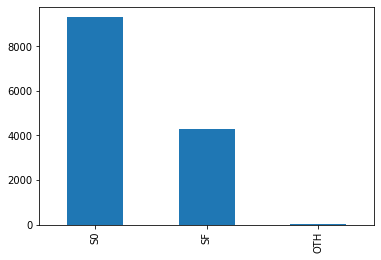

In [ ]:
mc_8_1['conn_state'].value_counts().plot(kind='bar')

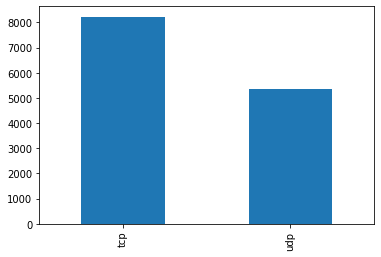

In [ ]:
mc_8_1['proto'].value_counts().plot(kind='bar')

### Correlation Plot

In [ ]:
corr_matrix = mc_8_1.corr()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.orig_p,1.000000,-0.601644,0.114746,-0.246357,-0.277197,nan,0.262673,0.105184,-0.657378,-0.651061
id.resp_p,-0.601644,1.000000,-0.068703,0.163143,0.187647,nan,-0.168631,-0.066774,0.439710,0.435198
duration,0.114746,-0.068703,1.000000,0.110400,0.002730,nan,0.679352,0.721037,0.233506,0.236348
orig_bytes,-0.246357,0.163143,0.110400,1.000000,0.916673,nan,-0.411734,-0.286622,0.544217,0.544325
resp_bytes,-0.277197,0.187647,0.002730,0.916673,1.000000,nan,-0.445865,-0.329894,0.570496,0.578009
missed_bytes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
orig_pkts,0.262673,-0.168631,0.679352,-0.411734,-0.445865,nan,1.000000,0.980008,0.004263,0.005994
orig_ip_bytes,0.105184,-0.066774,0.721037,-0.286622,-0.329894,nan,0.980008,1.000000,0.182087,0.182966
resp_pkts,-0.657378,0.439710,0.233506,0.544217,0.570496,nan,0.004263,0.182087,1.000000,0.997286
resp_ip_bytes,-0.651061,0.435198,0.236348,0.544325,0.578009,nan,0.005994,0.182966,0.997286,1.000000


## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars = final_mc_1_1.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False  True  True  True  True  True  True False False  True
 False  True False  True False False  True False False False False False
 False  True  True False False False False False  True  True False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False  True]
[ 69  71  68   1   1   1   1   1   1  36  26   1   5   1  55   1  67  20
   1  23  61 115  10 110  13   1   1   7  12 117  31  11   1   1   2 107
  48  32  81  50  4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [ ]:
alpha=X_train.columns


In [ ]:
alpha[[False, False, False,  True,  True,  True,  True,  True,  True, False, False,  True,
 False,  True, False,  True, False, False,  True, False, False, False, False, False,
 False,  True,  True, False, False, False, False, False,  True,  True, False, False,
 False, False, False, False, False, False, False, False,  True, False,  True, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False,  True,
 False, False, False, False, False, False, False, False,  True, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False,  True, False, False, False, False,
 False, False, False, False,  True]]

Index(['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'],
      dtype='object')

In [ ]:
z = y_train
print(z.columns.values)

['label']


In [ ]:
cols=['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'] 
X = pd.DataFrame(X_train[cols])
y = pd.DataFrame(z)

In [ ]:
print(y.shape)
print(X.shape)
print(y.dtypes)
print(X.dtypes)

In [ ]:
correlated_features = set()
correlation_matrix = X.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

5

## Model Building

In [ ]:
# Removing unused columns
final_mc_8_1 = mc_8_1[['proto','duration','resp_bytes','conn_state','history','orig_ip_bytes','resp_ip_bytes','label']]

In [ ]:
print("No. of Unique values in variable Protocol:", final_mc_8_1.proto.nunique())
print("No. of Unique values in variable Connection State:", final_mc_8_1.conn_state.nunique())
print("No. of Unique values in variable History:", final_mc_8_1.history.nunique())

In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(final_mc_8_1['proto'],drop_first=True)
connection_state = pd.get_dummies(final_mc_8_1['conn_state'],drop_first=True)
History = pd.get_dummies(final_mc_8_1['history'],drop_first=True)

In [ ]:
# Dropping the original columns
final_mc_8_1.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(final_mc_8_1.shape)

(13596, 5)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Concatenating the dummy variables in the final dataset
final_mc_8_1 = pd.concat([final_mc_8_1,protocol,connection_state,History],axis=1)
print(final_mc_8_1.shape)

(13596, 12)


In [ ]:
print(final_mc_8_1.head(5))
print(final_mc_8_1.columns)

   duration  resp_bytes  orig_ip_bytes  resp_ip_bytes  ... D^d  Dd  S  ^d
0  0.005490        48.0             76             76  ...   0   1  0   0
1  0.001741        48.0             76             76  ...   0   1  0   0
2  0.004495        48.0             76             76  ...   0   1  0   0
3  0.006988        48.0             76             76  ...   0   1  0   0
4  0.001487        48.0             76             76  ...   0   1  0   0

[5 rows x 12 columns]
Index(['duration', 'resp_bytes', 'orig_ip_bytes', 'resp_ip_bytes', 'label',
       'udp', 'S0', 'SF', 'D^d', 'Dd', 'S', '^d'],
      dtype='object')


In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(final_mc_8_1.label.value_counts())
final_mc_8_1["label"].replace({"Malicious": "1", "Benign": "0"}, inplace=True)
print(final_mc_8_1.label.value_counts())

Malicious    8222
Benign       5374
Name: label, dtype: int64
1    8222
0    5374
Name: label, dtype: int64


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(final_mc_8_1.drop('label',axis=1), 
                                                    final_mc_8_1['label'], test_size=0.20, 
                                                    random_state=101)
y_train1 = pd.DataFrame(y_train1)
y_test1 = pd.DataFrame(y_test1)

In [ ]:
X_train1.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_8_1_X_train.csv')
y_train1.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_8_1_y_train.csv')
X_test1.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_8_1_X_test.csv')
y_test1.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_8_1_y_test.csv')

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", 20)

In [ ]:
# Logistic Regression: Training and Predicting the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train1,y_train1)
predictions = logmodel.predict(X_test1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn import svm

#Create an svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: ignored

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(np.asarray(pd.DataFrame(y_train1.astype(int))),np.asarray(pd.DataFrame(X_train1)))
result=logit_model.fit(method = 'bfgs')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 35
         Gradient evaluations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 1.000     
Dependent Variable: y                AIC:              18.0023   
Date:               2020-08-16 12:45 BIC:              83.6512   
No. Observations:   10876            Log-Likelihood:   -0.0011726
Df Model:           8                LL-Null:          -7310.1   
Df Residuals:       10867            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
---------------------------------------------------------------------
         Coef.       Std.Err.      z      P>|z|     [0.025     0.975]
---------------------------------------------------------------------
x1       -3.1616          nan     nan       nan        nan        nan
x2       -0.0871          nan     nan       na

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## Model Evaluation on Test Data

In [ ]:
# Model Evaluation on Test Data
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00      1673

    accuracy                           1.00      2720
   macro avg       1.00      1.00      1.00      2720
weighted avg       1.00      1.00      1.00      2720



# Working with file_60_1_Gagfyt

In [ ]:
mc_60_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_60_1_Gagfyt.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning & Transformation

In [ ]:
#Rearranging the columns
mc_60_1 = shift_colnames(mc_60_1)

# Converting epoch time to normal timestamp
mc_60_1 = time_converter(mc_60_1)

# Replacing NA with Benign in last column
mc_60_1["detailed-label"] = mc_60_1["detailed-label"].fillna("Benign")

In [ ]:
# Looking at the dataset
print(mc_60_1.head(5))
print(mc_60_1.tail(5))
print(mc_60_1.shape)
print(mc_60_1.columns)

In [ ]:
mc_60_1["detailed-label"].value_counts()

DDoS             3578457
Benign              2476
C&C-HeartBeat         95
Name: detailed-label, dtype: int64

## Missing Value Analysis

In [ ]:
# Proportion of Missing Value
find_missing_values(mc_60_1)

ts                0.000000
uid               0.000000
id.orig_h         0.000000
id.orig_p         0.000000
id.resp_h         0.000000
id.resp_p         0.000000
proto             0.000000
conn_state        0.000000
missed_bytes      0.000000
history           0.000028
orig_pkts         0.000000
orig_ip_bytes     0.000000
resp_pkts         0.000000
resp_ip_bytes     0.000000
label             0.000000
detailed-label    0.000000
dtype: float64


In [ ]:
#Drop the columns having missing values more than 70%
mc_60_1 = drop_cols(mc_60_1)

In [ ]:
# Imputing Duration variable with median
#mc_60_1.duration = mc_60_1.duration.fillna(mc_60_1.duration.median())

In [ ]:
# Deleting the rows with missing values
mc_60_1.dropna(subset = ["history"], inplace=True)
mc_60_1.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                float64
id.resp_h                 object
id.resp_p                float64
proto                     object
conn_state                object
missed_bytes             float64
history                   object
orig_pkts                float64
orig_ip_bytes            float64
resp_pkts                float64
resp_ip_bytes            float64
label                     object
detailed-label            object
dtype: object

## Exploratory Data Analysis

In [ ]:
# Data Description
mc_60_1.describe()

,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,3.581027e+06,3.581027e+06,3581027.0,3.581027e+06,3.581027e+06,3.581027e+06,3.581027e+06
mean,3.278867e+04,6.229237e+04,0.0,7.471227e+01,2.706977e+03,3.127874e-03,1.818808e-01
std,1.892245e+04,1.613964e+03,0.0,4.605684e+04,1.549401e+06,5.082058e+00,2.755392e+02
min,0.000000e+00,2.100000e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.639000e+04,6.233600e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.279300e+04,6.233600e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.917450e+04,6.233600e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.374300e+04,0.0,6.602735e+07,1.914793e+09,9.613000e+03,5.201160e+05


### Analysing Time Dependency

ts
2019-09-20 00:00:00         59
2019-09-20 01:00:00         64
2019-09-20 02:00:00         24
2019-09-20 03:00:00         24
2019-09-20 04:00:00         23
2019-09-20 05:00:00         25
2019-09-20 06:00:00         21
2019-09-20 07:00:00         25
2019-09-20 08:00:00         20
2019-09-20 09:00:00         19
2019-09-20 10:00:00         23
2019-09-20 11:00:00         19
2019-09-20 12:00:00         22
2019-09-20 13:00:00         20
2019-09-20 14:00:00         22
2019-09-20 15:00:00         22
2019-09-20 16:00:00         19
2019-09-20 17:00:00         24
2019-09-20 18:00:00         20
2019-09-20 19:00:00         22
2019-09-20 20:00:00         20
2019-09-20 21:00:00         20
2019-09-20 22:00:00    3580428
2019-09-20 23:00:00         23
2019-09-21 00:00:00         19
Freq: H, Name: uid, dtype: int64


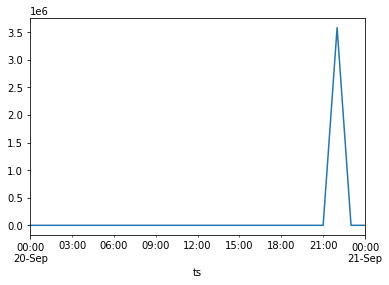

In [ ]:
print(mc_60_1.resample('1H', on='ts').uid.count())
mc_60_1.resample('1H', on='ts').uid.count().plot()


### Analysing Distribution of Features

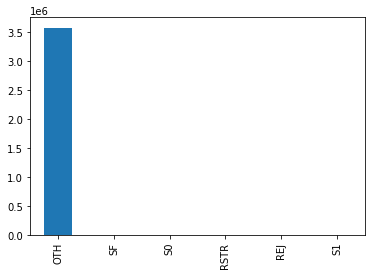

In [ ]:
mc_60_1['conn_state'].value_counts().plot(kind='bar')

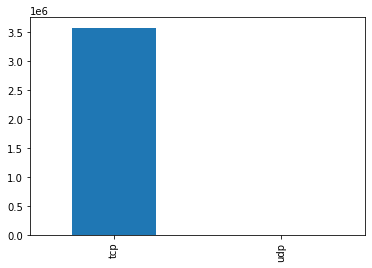

In [ ]:
mc_60_1['proto'].value_counts().plot(kind='bar')

### Correlation Plot

In [ ]:
corr_matrix = mc_60_1.corr()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.orig_p,1.000000,-0.023467,nan,0.001264,0.001278,0.000066,0.000050
id.resp_p,-0.023467,1.000000,nan,-0.057851,-0.057967,-0.017638,-0.019323
missed_bytes,nan,nan,nan,nan,nan,nan,nan
orig_pkts,0.001264,-0.057851,nan,1.000000,0.932876,0.000102,0.000102
orig_ip_bytes,0.001278,-0.057967,nan,0.932876,1.000000,0.000164,0.000164
resp_pkts,0.000066,-0.017638,nan,0.000102,0.000164,1.000000,0.999116
resp_ip_bytes,0.000050,-0.019323,nan,0.000102,0.000164,0.999116,1.000000


Missed_bytes column contains only one value i.e 0. Hence will not use this column in the analysis.

## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars = final_mc_1_1.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [ ]:
alpha=X_train.columns


In [ ]:
alpha[[False, False, False,  True,  True,  True,  True,  True,  True, False, False,  True,
 False,  True, False,  True, False, False,  True, False, False, False, False, False,
 False,  True,  True, False, False, False, False, False,  True,  True, False, False,
 False, False, False, False, False, False, False, False,  True, False,  True, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False,  True,
 False, False, False, False, False, False, False, False,  True, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False,  True, False, False, False, False,
 False, False, False, False,  True]]

Index(['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'],
      dtype='object')

In [ ]:
z = y_train
print(z.columns.values)

['label']


In [ ]:
cols=['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'] 
X = pd.DataFrame(X_train[cols])
y = pd.DataFrame(z)

In [ ]:
print(y.shape)
print(X.shape)
print(y.dtypes)
print(X.dtypes)

In [ ]:
correlated_features = set()
correlation_matrix = X.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

5

## Model Building

In [ ]:
# Removing unused columns
final_mc_60_1 = mc_60_1[['proto','conn_state','history','orig_ip_bytes','resp_ip_bytes','label']]

In [ ]:
print("No. of Unique values in variable Protocol:", final_mc_60_1.proto.nunique())
print("No. of Unique values in variable Connection State:", final_mc_60_1.conn_state.nunique())
print("No. of Unique values in variable History:", final_mc_60_1.history.nunique())

No. of Unique values in variable Protocol: 2
No. of Unique values in variable Connection State: 6
No. of Unique values in variable History: 9


In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(final_mc_60_1['proto'],drop_first=True)
connection_state = pd.get_dummies(final_mc_60_1['conn_state'],drop_first=True)
History = pd.get_dummies(final_mc_60_1['history'],drop_first=True)

In [ ]:
# Dropping the original columns
final_mc_60_1.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(final_mc_60_1.shape)

(3581027, 3)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Concatenating the dummy variables in the final dataset
final_mc_60_1 = pd.concat([final_mc_60_1,protocol,connection_state,History],axis=1)
print(final_mc_60_1.shape)

(3581027, 17)


In [ ]:
print(final_mc_60_1.head(5))
print(final_mc_60_1.columns)

   orig_ip_bytes  resp_ip_bytes      label  udp  ...  ShAdDaT  ShAdfDr  Sr  ^c
0          152.0          152.0     Benign    1  ...        0        0   0   0
1          152.0          152.0     Benign    1  ...        0        0   0   0
2         1572.0          540.0  Malicious    0  ...        0        1   0   0
3        26336.0        36368.0     Benign    0  ...        0        0   0   0
4         1572.0          540.0  Malicious    0  ...        0        1   0   0

[5 rows x 17 columns]
Index(['orig_ip_bytes', 'resp_ip_bytes', 'label', 'udp', 'REJ', 'RSTR', 'S0',
       'S1', 'SF', 'D', 'Dd', 'DdAaFf', 'S', 'ShAdDaT', 'ShAdfDr', 'Sr', '^c'],
      dtype='object')


In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(final_mc_60_1.label.value_counts())
final_mc_60_1["label"].replace({"Malicious": "1", "Benign": "0"}, inplace=True)
print(final_mc_60_1.label.value_counts())

Malicious    3578552
Benign          2475
Name: label, dtype: int64
1    3578552
0       2475
Name: label, dtype: int64


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_mc_60_1.drop('label',axis=1), 
                                                    final_mc_60_1['label'], test_size=0.15, 
                                                    random_state=101)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
X_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_X_train.csv')
y_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_y_train.csv')
X_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_X_test.csv')
y_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_1_1_y_test.csv')

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", 20)

In [ ]:
# Logistic Regression: Training and Predicting the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import svm

#Create an svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

## Model Evaluation on Test Data

In [ ]:
# Model Evaluation on Test Data
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

# Working with file_49_1_Mirai

In [ ]:
mc_49_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_49_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning & Transformation

In [ ]:
#Rearranging the columns
mc_49_1 = shift_colnames(mc_49_1)

# Converting epoch time to normal timestamp
mc_49_1 = time_converter(mc_49_1)

# Replacing NA with Benign in last column
mc_49_1["detailed-label"] = mc_49_1["detailed-label"].fillna("Benign")

In [ ]:
# Looking at the dataset
print(mc_49_1.head(5))
print(mc_49_1.tail(5))
print(mc_49_1.shape)
print(mc_49_1.columns)

                   ts                 uid  ...      label  detailed-label
0 2019-02-28 19:50:31   Cnkx4U1xJgOIPooe2  ...  Malicious    FileDownload
1 2019-02-28 19:50:33  C5t6Kp1UnQyH7JCC45  ...  Malicious    FileDownload
2 2019-02-28 19:50:35  CRdXqi4p3HG1obs6xl  ...  Malicious    FileDownload
3 2019-02-28 19:50:37  Co7Sfi3KfjPoJwW5Kf  ...     Benign          Benign
4 2019-02-28 19:50:44  CKaKqD34bwvqLUcID9  ...  Malicious    FileDownload

[5 rows x 23 columns]
                         ts  ...             detailed-label
5410556 2019-03-01 03:10:17  ...  PartOfAHorizontalPortScan
5410557 2019-02-28 19:50:51  ...           C&C-FileDownload
5410558 2019-03-01 03:07:05  ...                        C&C
5410559 2019-03-01 03:09:40  ...                     Benign
5410560 2019-03-01 03:09:37  ...                     Benign

[5 rows x 23 columns]
(5410561, 23)
Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes

In [ ]:
mc_49_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    5404959
Benign                          3665
C&C                             1922
FileDownload                      14
C&C-FileDownload                   1
Name: detailed-label, dtype: int64

## Missing Value Analysis

In [ ]:
# Proportion of Missing Value
find_missing_values(mc_49_1)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.999519
duration            0.000018
orig_bytes          0.000018
resp_bytes          0.000018
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.030274
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label      0.000000
dtype: float64


In [ ]:
# Imputing Duration variable with median
# mc_49_1.duration = mc_49_1.duration.fillna(mc_49_1.duration.median())

In [ ]:
#Drop the columns having missing values more than 70%
mc_49_1 = drop_cols(mc_49_1)

In [ ]:
# Deleting the rows with missing values
mc_49_1.dropna(subset = ["history","duration","orig_bytes","resp_bytes"], inplace=True)
mc_49_1.dtypes

## Exploratory Data Analysis

In [ ]:
# Data Description
mc_49_1.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,5.408922e+06,5.408922e+06,5.408922e+06,5.408922e+06,5.408922e+06,5408922.0,5.408922e+06,5.408922e+06,5.408922e+06,5.408922e+06
mean,2.735527e+04,8.079502e+03,8.712846e-03,7.797857e-03,3.965380e-01,0.0,3.002896e+00,1.201870e+02,4.029084e-03,9.858171e-01
std,3.224713e+03,8.677875e+01,1.132908e+01,1.342981e+00,2.514043e+02,0.0,1.952108e+00,8.410777e+01,9.250459e-01,5.254835e+02
min,6.800000e+01,2.200000e+01,1.000000e-06,0.000000e+00,0.000000e+00,0.0,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
25%,2.415900e+04,8.081000e+03,5.000000e-06,0.000000e+00,0.000000e+00,0.0,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
50%,3.053500e+04,8.081000e+03,5.000000e-06,0.000000e+00,0.000000e+00,0.0,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
75%,3.053500e+04,8.081000e+03,2.540000e-04,0.000000e+00,0.000000e+00,0.0,4.000000e+00,1.600000e+02,0.000000e+00,0.000000e+00
max,6.070000e+04,3.053500e+04,2.634742e+04,9.000000e+02,2.095600e+05,0.0,1.796000e+03,9.375800e+04,1.792000e+03,4.345280e+05


### Analysing Time Dependency

ts
2019-02-28 19:00:00    113067
2019-02-28 20:00:00    738579
2019-02-28 21:00:00    738001
2019-02-28 22:00:00    738841
2019-02-28 23:00:00    738465
2019-03-01 00:00:00    738668
2019-03-01 01:00:00    738334
2019-03-01 02:00:00    738476
2019-03-01 03:00:00    126491
Freq: H, Name: uid, dtype: int64


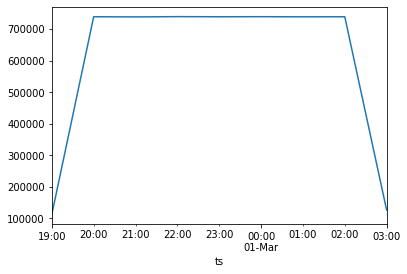

In [ ]:
print(mc_49_1.resample('1H', on='ts').uid.count())
mc_49_1.resample('1H', on='ts').uid.count().plot()


### Analysing Distribution of Features

In [ ]:
mc_49_1['conn_state'].value_counts().plot(kind='bar')

In [ ]:
mc_49_1['proto'].value_counts().plot(kind='bar')

### Correlation Plot

In [ ]:
corr_matrix = mc_49_1.corr()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.orig_p,1.000000,-0.089964,0.003331,-0.003894,0.011631,nan,0.011189,0.016096,0.026330,0.013496
id.resp_p,-0.089964,1.000000,-0.019418,-0.377816,-0.144600,nan,-0.077507,-0.112375,-0.187961,-0.154718
duration,0.003331,-0.019418,1.000000,0.005542,0.008048,nan,0.395943,0.479866,0.834139,0.084168
orig_bytes,-0.003894,-0.377816,0.005542,1.000000,0.174513,nan,0.048827,0.082715,0.113405,0.176310
resp_bytes,0.011631,-0.144600,0.008048,0.174513,1.000000,nan,0.170456,0.217114,0.415402,0.996529
missed_bytes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
orig_pkts,0.011189,-0.077507,0.395943,0.048827,0.170456,nan,1.000000,0.992013,0.460742,0.205502
orig_ip_bytes,0.016096,-0.112375,0.479866,0.082715,0.217114,nan,0.992013,1.000000,0.565208,0.259754
resp_pkts,0.026330,-0.187961,0.834139,0.113405,0.415402,nan,0.460742,0.565208,1.000000,0.489547
resp_ip_bytes,0.013496,-0.154718,0.084168,0.176310,0.996529,nan,0.205502,0.259754,0.489547,1.000000


## Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars = final_mc_49_1.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False  True  True  True  True  True  True False False  True
 False  True False  True False False  True False False False False False
 False  True  True False False False False False  True  True False False
 False False False False False False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False  True]
[ 69  71  68   1   1   1   1   1   1  36  26   1   5   1  55   1  67  20
   1  23  61 115  10 110  13   1   1   7  12 117  31  11   1   1   2 107
  48  32  81  50  4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [ ]:
alpha=X_train.columns


In [ ]:
alpha[[False, False, False,  True,  True,  True,  True,  True,  True, False, False,  True,
 False,  True, False,  True, False, False,  True, False, False, False, False, False,
 False,  True,  True, False, False, False, False, False,  True,  True, False, False,
 False, False, False, False, False, False, False, False,  True, False,  True, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False,  True,
 False, False, False, False, False, False, False, False,  True, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, False, False, False, False, False, False,  True, False, False, False, False,
 False, False, False, False,  True]]

Index(['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'],
      dtype='object')

In [ ]:
z = y_train
print(z.columns.values)

['label']


In [ ]:
cols=['udp', 'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'SF', 'D', 'Dd', 'FaAr',
       'HaDdAFf', 'HaDdAfF', 'R', 'S', 'ShADadfF', 'ShADafF', 'ShAdDaFf',
       'ShAdDafF', 'ShAr', '^r'] 
X = pd.DataFrame(X_train[cols])
y = pd.DataFrame(z)

In [ ]:
print(y.shape)
print(X.shape)
print(y.dtypes)
print(X.dtypes)

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(np.asarray(y.astype(int)),np.asarray(X))
#result = logit_model.fit()
#print(result.summary2())

In [ ]:
result = logit_model.fit()

In [ ]:
correlated_features = set()
correlation_matrix = X.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

5

## Model Building

In [ ]:
# Removing unused columns
final_mc_49_1 = mc_49_1[['proto','duration','conn_state','history','orig_ip_bytes','resp_ip_bytes','label']]

In [ ]:
print("No. of Unique values in variable Protocol:", final_mc_49_1.proto.nunique())
print("No. of Unique values in variable Connection State:", final_mc_49_1.conn_state.nunique())
print("No. of Unique values in variable History:", final_mc_49_1.history.nunique())

No. of Unique values in variable Protocol: 2
No. of Unique values in variable Connection State: 8
No. of Unique values in variable History: 32


In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(final_mc_49_1['proto'],drop_first=True)
connection_state = pd.get_dummies(final_mc_49_1['conn_state'],drop_first=True)
History = pd.get_dummies(final_mc_49_1['history'],drop_first=True)

In [ ]:
# Dropping the original columns
final_mc_49_1.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(final_mc_49_1.shape)

(5408922, 4)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Concatenating the dummy variables in the final dataset
final_mc_49_1 = pd.concat([final_mc_49_1,protocol,connection_state,History],axis=1)
print(final_mc_49_1.shape)

(5408922, 43)


In [ ]:
print(final_mc_49_1.head(5))
print(final_mc_49_1.columns)

In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(final_mc_49_1.label.value_counts())
final_mc_49_1["label"].replace({"Malicious": "1", "Benign": "0"}, inplace=True)
print(final_mc_49_1.label.value_counts())

Malicious    5406895
Benign          2027
Name: label, dtype: int64
1    5406895
0       2027
Name: label, dtype: int64


Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [ ]:
X = final_mc_49_1.loc[:, final_mc_49_1.columns != 'label']
y = final_mc_49_1.loc[:, final_mc_49_1.columns == 'label']
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X,columns = columns )
os_data_y= pd.DataFrame(data = os_data_y,columns = ['y'])


In [ ]:
# we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of Benign in oversampled data", len(os_data_y[os_data_y['y'] == '0']))
print("Number of Malicious",len(os_data_y[os_data_y['y'] == '1']))
print("Proportion of Benign data in oversampled data is ",len(os_data_y[os_data_y['y'] == '0'])/len(os_data_X))
print("Proportion of Malicious data in oversampled data is ",len(os_data_y[os_data_y['y'] == '1'])/len(os_data_X))

length of oversampled data is  7569616
Number of Benign in oversampled data 3784808
Number of Malicious 3784808
Proportion of Benign data in oversampled data is  0.5
Proportion of Malicious data in oversampled data is  0.5


Converting the string values to int values in the target variable.

In [ ]:
os_data_y.y = os_data_y.y.astype(int)

Club both the datasets into one.

In [ ]:
print(os_data_X.shape)
os_data_X['label'] = os_data_y.y
print(os_data_X.shape)

(7569616, 42)
(7569616, 43)


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(os_data_X.drop('label',axis=1), 
                                                    os_data_X['label'], test_size=0.15, 
                                                    random_state=101)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
X_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_49_1_X_train.csv')
y_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_49_1_y_train.csv')
X_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_49_1_X_test.csv')
y_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/mc_49_1_y_test.csv')

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", 20)

In [ ]:
# Logistic Regression: Training and Predicting the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Model Evaluation on Test Data

In [ ]:
# Model Evaluation on Test Data
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
from sklearn import svm

#Create an svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Working with file_3_1

In [ ]:
mc_3_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_3_1_Muhstik.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning & Transformation

In [ ]:
#Rearranging the columns
mc_3_1 = shift_colnames(mc_3_1)

# Converting epoch time to normal timestamp
mc_3_1 = time_converter(mc_3_1)

# Replacing NA with Benign in last column
mc_3_1["detailed-label"] = mc_3_1["detailed-label"].fillna("Benign")

In [ ]:
mc_3_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    145597
Attack                         5962
Benign                         4536
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
# Dropping empty columns
file_3_1 = drop_cols(file_3_1)
# Converting epoch time to datetime format
file_3_1 = time_converter(file_3_1)
# Sorting the dataset
file_3_1 = file_3_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_3_1.ts.min())
print(file_3_1.ts.max())

NameError: ignored

In [ ]:
print(file_3_1.resample('1H', on='ts').uid.count())

ts
2018-05-19 18:00:00      34
2018-05-19 19:00:00    6203
2018-05-19 20:00:00    2246
2018-05-19 21:00:00    5146
2018-05-19 22:00:00    2575
2018-05-19 23:00:00    6505
2018-05-20 00:00:00    2530
2018-05-20 01:00:00    6048
2018-05-20 02:00:00    2472
2018-05-20 03:00:00    5989
2018-05-20 04:00:00    2460
2018-05-20 05:00:00    6072
2018-05-20 06:00:00    2467
2018-05-20 07:00:00    6435
2018-05-20 08:00:00    2614
2018-05-20 09:00:00    6268
2018-05-20 10:00:00    2808
2018-05-20 11:00:00    6115
2018-05-20 12:00:00    2546
2018-05-20 13:00:00    5873
2018-05-20 14:00:00    2422
2018-05-20 15:00:00    6230
2018-05-20 16:00:00    2756
2018-05-20 17:00:00    6129
2018-05-20 18:00:00    2507
2018-05-20 19:00:00    5924
2018-05-20 20:00:00    2681
2018-05-20 21:00:00    6323
2018-05-20 22:00:00    2614
2018-05-20 23:00:00    6049
2018-05-21 00:00:00    2477
2018-05-21 01:00:00    6404
2018-05-21 02:00:00    2478
2018-05-21 03:00:00    6226
2018-05-21 04:00:00    2568
2018-05-21 05:00:

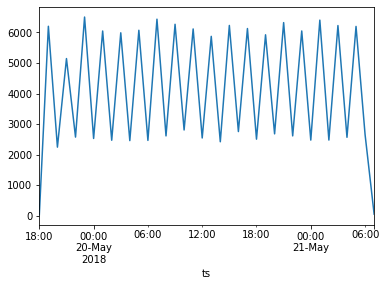

In [ ]:
file_3_1.resample('1H', on='ts').uid.count().plot()


# Working on File_4_1 (LED)


In [ ]:
# Dropping empty columns
file_4_1 = drop_cols(file_4_1)
# Converting epoch time to datetime format
file_4_1 = time_converter(file_4_1)
# Sorting the dataset
file_4_1 = file_4_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_4_1.ts.min())
print(file_4_1.ts.max())

ts
2018-10-25 12:00:00    24
2018-10-25 13:00:00    27
2018-10-25 14:00:00    24
2018-10-25 15:00:00    21
2018-10-25 16:00:00    21
2018-10-25 17:00:00    22
2018-10-25 18:00:00    18
2018-10-25 19:00:00    18
2018-10-25 20:00:00    19
2018-10-25 21:00:00    17
2018-10-25 22:00:00    16
2018-10-25 23:00:00    17
2018-10-26 00:00:00    22
2018-10-26 01:00:00    18
2018-10-26 02:00:00    18
2018-10-26 03:00:00    18
2018-10-26 04:00:00    17
2018-10-26 05:00:00    15
2018-10-26 06:00:00    19
2018-10-26 07:00:00    18
2018-10-26 08:00:00    33
2018-10-26 09:00:00    30
Freq: H, Name: uid, dtype: int64


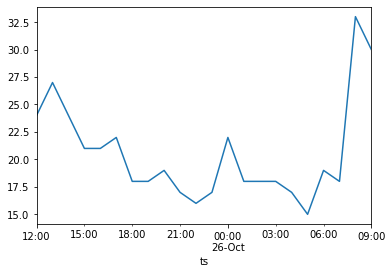

In [ ]:
print(file_4_1.resample('1H', on='ts').uid.count())
file_4_1.resample('1H', on='ts').uid.count().plot()

# Working with file_5_1

In [ ]:
file_5_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/HC_5_1_Echo.csv',delim_whitespace=True,na_values=['-','(empty)'])


In [ ]:
file_5_1 = drop_cols(file_5_1)

In [ ]:
file_5_1 = time_converter(file_5_1)

In [ ]:

# Sorting the dataset
file_5_1 = file_5_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_5_1.ts.min())
print(file_5_1.ts.max())

2018-09-21 09:40:23
2018-09-21 15:09:33


In [ ]:
file_5_1["detailed-label"] = file_5_1["detailed-label"].fillna("Benign")
find_missing_values(file_5_1)

ts                 0.000000
uid                0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
service           33.042213
duration          21.688501
orig_bytes        21.688501
resp_bytes        21.688501
conn_state         0.000000
missed_bytes       0.000000
history            6.259098
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
label              0.000000
detailed-label     0.000000
dtype: float64


In [ ]:
pct_null = file_5_1.isnull().sum() / len(file_5_1)
missing_features = pct_null[pct_null > 0.80].index
file_5_1.drop(missing_features, axis=1, inplace=True)

In [ ]:
file_5_1 = file_5_1.drop(['missed_bytes'], axis = 1) 

ts
2018-09-21 09:00:00    109
2018-09-21 10:00:00    262
2018-09-21 11:00:00    286
2018-09-21 12:00:00    213
2018-09-21 13:00:00    215
2018-09-21 14:00:00    197
2018-09-21 15:00:00     92
Freq: H, Name: uid, dtype: int64


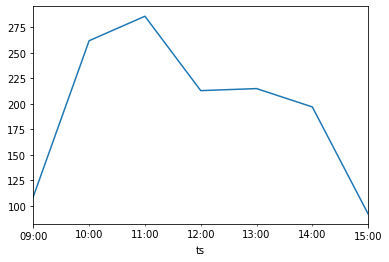

In [ ]:
print(file_5_1.resample('1H', on='ts').uid.count())
file_5_1.resample('1H', on='ts').uid.count().plot()

In [ ]:
corr_matrix = file_5_1.corr()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
id.orig_p,1.000000,-0.211081,0.074502,0.022963,0.030836,0.027454,0.031816,0.026790,0.026201
id.resp_p,-0.211081,1.000000,0.406387,-0.000002,-0.004003,-0.003429,-0.004900,-0.005555,-0.005325
duration,0.074502,0.406387,1.000000,0.346309,0.009477,0.036082,0.164632,0.018168,0.009706
orig_bytes,0.022963,-0.000002,0.346309,1.000000,0.004832,0.064430,0.445732,0.029077,0.005464
resp_bytes,0.030836,-0.004003,0.009477,0.004832,1.000000,0.998192,0.897296,0.999704,1.000000
orig_pkts,0.027454,-0.003429,0.036082,0.064430,0.998192,1.000000,0.922028,0.999351,0.998229
orig_ip_bytes,0.031816,-0.004900,0.164632,0.445732,0.897296,0.922028,1.000000,0.907741,0.897575
resp_pkts,0.026790,-0.005555,0.018168,0.029077,0.999704,0.999351,0.907741,1.000000,0.999719
resp_ip_bytes,0.026201,-0.005325,0.009706,0.005464,1.000000,0.998229,0.897575,0.999719,1.000000


# Working with file_7_1

In [ ]:
file_7_1_hc = drop_cols(file_7_1_hc)


In [ ]:
file_7_1_hc = time_converter(file_7_1_hc)
# Sorting the dataset
file_7_1_hc = file_7_1_hc.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_7_1_hc.ts.min())
print(file_7_1_hc.ts.max())


2019-07-03 13:16:59
2019-07-03 14:39:58


ts
2019-07-03 13:00:00    78
2019-07-03 14:00:00    52
Freq: H, Name: uid, dtype: int64


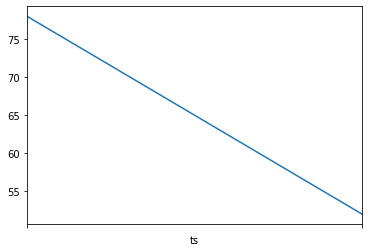

In [ ]:
print(file_7_1_hc.resample('1H', on='ts').uid.count())
file_7_1_hc.resample('1H', on='ts').uid.count().plot()

# Working with file_7_1_mc

In [ ]:
mc_7_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_7_1_LinuxMirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning & Transformation

In [ ]:
#Rearranging the columns
mc_7_1 = shift_colnames(mc_7_1)

# Converting epoch time to normal timestamp
mc_7_1 = time_converter(mc_7_1)

# Replacing NA with Benign in last column
mc_7_1["detailed-label"] = mc_7_1["detailed-label"].fillna("Benign")

In [ ]:
mc_7_1["detailed-label"].value_counts()

Okiru            11333397
Benign              75955
DDoS                39584
C&C-HeartBeat        5778
Name: detailed-label, dtype: int64

In [ ]:
mc_3_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    145597
Attack                         5962
Benign                         4536
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
# Dropping empty columns
file_3_1 = drop_cols(file_3_1)
# Converting epoch time to datetime format
file_3_1 = time_converter(file_3_1)
# Sorting the dataset
file_3_1 = file_3_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_3_1.ts.min())
print(file_3_1.ts.max())

NameError: ignored

In [ ]:
print(file_3_1.resample('1H', on='ts').uid.count())

ts
2018-05-19 18:00:00      34
2018-05-19 19:00:00    6203
2018-05-19 20:00:00    2246
2018-05-19 21:00:00    5146
2018-05-19 22:00:00    2575
2018-05-19 23:00:00    6505
2018-05-20 00:00:00    2530
2018-05-20 01:00:00    6048
2018-05-20 02:00:00    2472
2018-05-20 03:00:00    5989
2018-05-20 04:00:00    2460
2018-05-20 05:00:00    6072
2018-05-20 06:00:00    2467
2018-05-20 07:00:00    6435
2018-05-20 08:00:00    2614
2018-05-20 09:00:00    6268
2018-05-20 10:00:00    2808
2018-05-20 11:00:00    6115
2018-05-20 12:00:00    2546
2018-05-20 13:00:00    5873
2018-05-20 14:00:00    2422
2018-05-20 15:00:00    6230
2018-05-20 16:00:00    2756
2018-05-20 17:00:00    6129
2018-05-20 18:00:00    2507
2018-05-20 19:00:00    5924
2018-05-20 20:00:00    2681
2018-05-20 21:00:00    6323
2018-05-20 22:00:00    2614
2018-05-20 23:00:00    6049
2018-05-21 00:00:00    2477
2018-05-21 01:00:00    6404
2018-05-21 02:00:00    2478
2018-05-21 03:00:00    6226
2018-05-21 04:00:00    2568
2018-05-21 05:00:

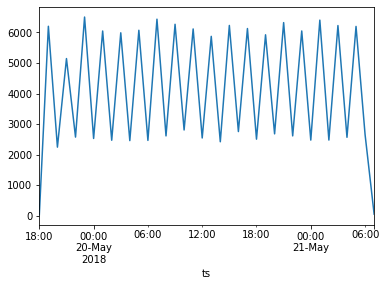

In [ ]:
file_3_1.resample('1H', on='ts').uid.count().plot()


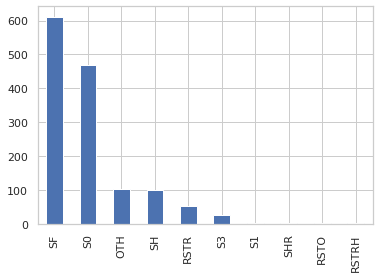

In [ ]:
file_5_1['conn_state'].value_counts().plot(kind='bar')

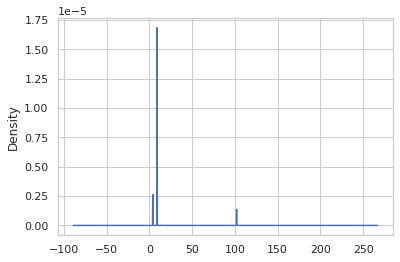

In [ ]:
s = file_7_1_mc.resp_pkts
ax = s.plot.kde()

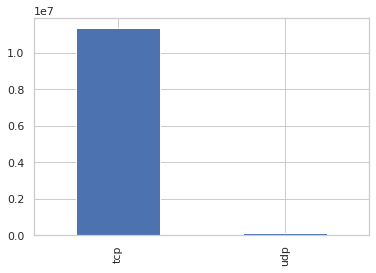

In [ ]:
file_7_1_mc['proto'].value_counts().plot(kind='bar')

# Working with file_20_1

In [ ]:
mc_20_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_20_1_Torii.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

## Data Cleaning & Transformation

In [ ]:
#Rearranging the columns
mc_20_1 = shift_colnames(mc_20_1)

# Converting epoch time to normal timestamp
mc_20_1 = time_converter(mc_20_1)

# Replacing NA with Benign in last column
mc_20_1["detailed-label"] = mc_20_1["detailed-label"].fillna("Benign")

In [ ]:
mc_20_1["detailed-label"].value_counts()

Benign       3193
C&C-Torii      16
Name: detailed-label, dtype: int64

In [ ]:
mc_7_1["detailed-label"].value_counts()

Okiru            11333397
Benign              75955
DDoS                39584
C&C-HeartBeat        5778
Name: detailed-label, dtype: int64

In [ ]:
mc_3_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    145597
Attack                         5962
Benign                         4536
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
# Dropping empty columns
file_3_1 = drop_cols(file_3_1)
# Converting epoch time to datetime format
file_3_1 = time_converter(file_3_1)
# Sorting the dataset
file_3_1 = file_3_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_3_1.ts.min())
print(file_3_1.ts.max())

NameError: ignored

In [ ]:
print(file_3_1.resample('1H', on='ts').uid.count())

ts
2018-05-19 18:00:00      34
2018-05-19 19:00:00    6203
2018-05-19 20:00:00    2246
2018-05-19 21:00:00    5146
2018-05-19 22:00:00    2575
2018-05-19 23:00:00    6505
2018-05-20 00:00:00    2530
2018-05-20 01:00:00    6048
2018-05-20 02:00:00    2472
2018-05-20 03:00:00    5989
2018-05-20 04:00:00    2460
2018-05-20 05:00:00    6072
2018-05-20 06:00:00    2467
2018-05-20 07:00:00    6435
2018-05-20 08:00:00    2614
2018-05-20 09:00:00    6268
2018-05-20 10:00:00    2808
2018-05-20 11:00:00    6115
2018-05-20 12:00:00    2546
2018-05-20 13:00:00    5873
2018-05-20 14:00:00    2422
2018-05-20 15:00:00    6230
2018-05-20 16:00:00    2756
2018-05-20 17:00:00    6129
2018-05-20 18:00:00    2507
2018-05-20 19:00:00    5924
2018-05-20 20:00:00    2681
2018-05-20 21:00:00    6323
2018-05-20 22:00:00    2614
2018-05-20 23:00:00    6049
2018-05-21 00:00:00    2477
2018-05-21 01:00:00    6404
2018-05-21 02:00:00    2478
2018-05-21 03:00:00    6226
2018-05-21 04:00:00    2568
2018-05-21 05:00:

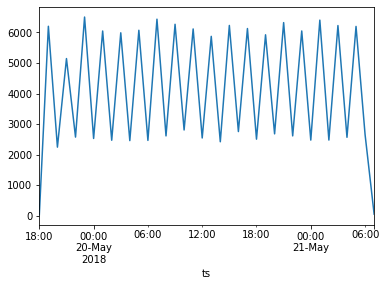

In [ ]:
file_3_1.resample('1H', on='ts').uid.count().plot()


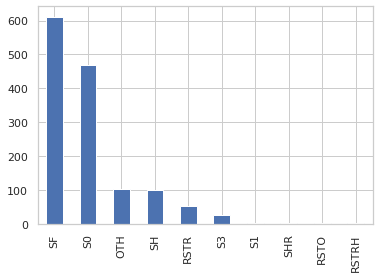

In [ ]:
file_5_1['conn_state'].value_counts().plot(kind='bar')

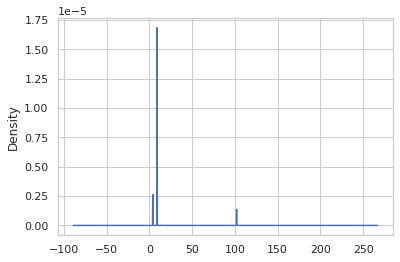

In [ ]:
s = file_7_1_mc.resp_pkts
ax = s.plot.kde()

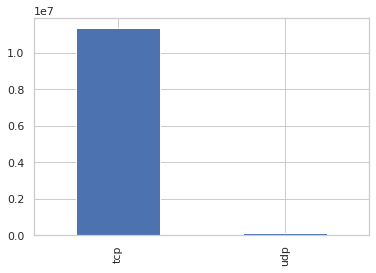

In [ ]:
file_7_1_mc['proto'].value_counts().plot(kind='bar')

In [ ]:
file_20_1 = drop_cols(file_20_1)
file_20_1 = time_converter(file_20_1)
# Sorting the dataset
file_20_1 = file_20_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_20_1.ts.min())
print(file_20_1.ts.max())

In [ ]:
print(file_20_1.resample('1H', on='ts').uid.count())
file_20_1.resample('1H', on='ts').uid.count().plot()

# Working with file_21_1

In [ ]:
mc_21_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_21_1_Torri.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])
#Rearranging the columns
mc_21_1 = shift_colnames(mc_21_1)

# Converting epoch time to normal timestamp
mc_21_1 = time_converter(mc_21_1)

# Replacing NA with Benign in last column
mc_21_1["detailed-label"] = mc_21_1["detailed-label"].fillna("Benign")
mc_21_1["detailed-label"].value_counts()

Benign       3272
C&C-Torii      14
Name: detailed-label, dtype: int64

In [ ]:
file_21_1 = drop_cols(file_21_1)
file_21_1 = time_converter(file_21_1)
# Sorting the dataset
file_21_1 = file_21_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_21_1.ts.min())
print(file_21_1.ts.max())

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            41.448570
duration           35.331710
orig_bytes         35.331710
resp_bytes         35.331710
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.030432
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label     99.573950
dtype: float64
2018-10-03 13:22:34
2018-10-04 13:16:41


In [ ]:
print(file_21_1.resample('1H', on='ts').uid.count())
file_21_1.resample('1H', on='ts').uid.count().plot()

# Working with file_34_1

In [ ]:
mc_34_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_34_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])
#Rearranging the columns
mc_34_1 = shift_colnames(mc_34_1)

# Converting epoch time to normal timestamp
mc_34_1 = time_converter(mc_34_1)

# Replacing NA with Benign in last column
mc_34_1["detailed-label"] = mc_34_1["detailed-label"].fillna("Benign")
mc_34_1["detailed-label"].value_counts()

DDoS                         14394
C&C                           6706
Benign                        1923
PartOfAHorizontalPortScan      122
Name: detailed-label, dtype: int64

# Working with file_35_1

In [ ]:
mc_35_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_35_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])
#Rearranging the columns
mc_35_1 = shift_colnames(mc_35_1)

# Converting epoch time to normal timestamp
mc_35_1 = time_converter(mc_35_1)

# Replacing NA with Benign in last column
mc_35_1["detailed-label"] = mc_35_1["detailed-label"].fillna("Benign")
mc_35_1["detailed-label"].value_counts()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Benign              8262389
DDoS                2185302
C&C                      81
C&C-FileDownload         12
Attack                    3
Name: detailed-label, dtype: int64

In [ ]:
file_34_1 = drop_cols(file_34_1)
file_34_1 = time_converter(file_34_1)
# Sorting the dataset
file_34_1 = file_34_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_34_1.ts.min())
print(file_34_1.ts.max())

In [ ]:
print(file_34_1.resample('1H', on='ts').uid.count())
file_34_1.resample('1H', on='ts').uid.count().plot()

# Working with file_42_1

In [ ]:
mc_42_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_42_1_Trojan.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])
#Rearranging the columns
mc_42_1 = shift_colnames(mc_42_1)

# Converting epoch time to normal timestamp
mc_42_1 = time_converter(mc_42_1)

# Replacing NA with Benign in last column
mc_42_1["detailed-label"] = mc_42_1["detailed-label"].fillna("Benign")
mc_42_1["detailed-label"].value_counts()

Benign              4420
C&C-FileDownload       3
FileDownload           3
Name: detailed-label, dtype: int64

In [ ]:
file_42_1 = drop_cols(file_42_1)
file_42_1 = time_converter(file_42_1)
# Sorting the dataset
file_42_1 = file_42_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_42_1.ts.min())
print(file_42_1.ts.max())

In [ ]:
print(file_42_1.resample('1H', on='ts').uid.count())
file_42_1.resample('1H', on='ts').uid.count().plot()

# Working with file_43_1


In [ ]:
mc_43_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_43_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ],nrows = 20000000)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
mc_43_1 = shift_colnames(mc_43_1)

# Converting epoch time to normal timestamp
mc_43_1 = time_converter(mc_43_1)

# Replacing NA with Benign in last column
mc_43_1["detailed-label"] = mc_43_1["detailed-label"].fillna("Benign")
mc_43_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    11259168
Benign                        6131022
Okiru                         2608805
C&C                               989
C&C-FileDownload                   14
FileDownload                        1
Name: detailed-label, dtype: int64

In [ ]:
del(mc_43_1)

# Working with file_44_1

In [ ]:
mc_44_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_44_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])
#Rearranging the columns
mc_44_1 = shift_colnames(mc_44_1)

# Converting epoch time to normal timestamp
mc_44_1 = time_converter(mc_44_1)

# Replacing NA with Benign in last column
mc_44_1["detailed-label"] = mc_44_1["detailed-label"].fillna("Benign")
mc_44_1["detailed-label"].value_counts()

Benign              211
C&C                  14
C&C-FileDownload     11
DDoS                  1
Name: detailed-label, dtype: int64

In [ ]:
file_44_1 = drop_cols(file_44_1)
file_44_1 = time_converter(file_44_1)
# Sorting the dataset
file_44_1 = file_44_1.sort_values(by = 'ts',ascending = True)
# Max and Min time
print(file_44_1.ts.min())
print(file_44_1.ts.max())

In [ ]:
print(file_44_1.resample('1H', on='ts').uid.count())
file_44_1.resample('1H', on='ts').uid.count().plot()

# Working with file_48_1

In [ ]:
mc_48_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_48_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
mc_48_1 = shift_colnames(mc_48_1)

# Converting epoch time to normal timestamp
mc_48_1 = time_converter(mc_48_1)

# Replacing NA with Benign in last column
mc_48_1["detailed-label"] = mc_48_1["detailed-label"].fillna("Benign")
mc_48_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan        3386119
Benign                              3734
Attack                              2752
C&C-PartOfAHorizontalPortScan        888
C&C-HeartBeat-Attack                 834
C&C-HeartBeat-FileDownload            11
Name: detailed-label, dtype: int64

# Working with file_52_1


In [ ]:
mc_52_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_52_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TypeError: ignored

In [ ]:
del(mc_52_1)

In [ ]:
mc_52_1 = shift_colnames(mc_52_1)

# Converting epoch time to normal timestamp
mc_52_1 = time_converter(mc_52_1)

# Replacing NA with Benign in last column
mc_52_1["detailed-label"] = mc_52_1["detailed-label"].fillna("Benign")
mc_52_1["detailed-label"].value_counts()

# Working with *file_36_1*


# # Working with *file_39_1*


In [ ]:
mc_39_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_39_1_IrcBot.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ],nrows = 20000000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
mc_39_1 = shift_colnames(mc_39_1)

# Converting epoch time to normal timestamp
mc_39_1 = time_converter(mc_39_1)

# Replacing NA with Benign in last column
mc_39_1["detailed-label"] = mc_39_1["detailed-label"].fillna("Benign")
mc_39_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    19997491
Benign                           1943
C&C                               375
Attack                            190
Name: detailed-label, dtype: int64

In [ ]:
del(mc_39_1)

# Working with file_9_1

In [ ]:
mc_9_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_9_1_LinuxHajime.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
mc_9_1 = shift_colnames(mc_9_1)

# Converting epoch time to normal timestamp
mc_9_1 = time_converter(mc_9_1)

# Replacing NA with Benign in last column
mc_9_1["detailed-label"] = mc_9_1["detailed-label"].fillna("Benign")
mc_9_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    6355745
Benign                         22548
Name: detailed-label, dtype: int64

# Working with file_33_1

In [ ]:
mc_33_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_33_1_Kenjiro.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7,
                                                                                                                                                              ],nrows = 20000000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
mc_33_1 = shift_colnames(mc_33_1)

# Converting epoch time to normal timestamp
mc_33_1 = time_converter(mc_33_1)

# Replacing NA with Benign in last column
mc_33_1["detailed-label"] = mc_33_1["detailed-label"].fillna("Benign")
mc_33_1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    14490489
Okiru                         4998847
Benign                         508892
C&C-HeartBeat                    1771
Name: detailed-label, dtype: int64

In [ ]:
del(mc_33_1)


# Sampling

##portscan

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_1_1_HideNSeek.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    539465
Benign                       469275
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "PartOfAHorizontalPortScan"
final_file1=dataset1[file1]
ff1_portscan = final_file1.sample(n = 10000) 

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

##DDoS

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_60_1_Gagfyt.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

DDoS             3578457
Benign              2476
C&C-HeartBeat         95
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "DDoS"
final_file1=dataset1[file1]
ff2_DDoS = final_file1.sample(n = 10000) 

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

##Okiru

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_36_1_Okiru.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

Okiru            13626744
C&C-HeartBeat       15688
Benign               2663
Okiru-Attack            3
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "Okiru"
final_file1=dataset1[file1]
ff3_Okiru=final_file1.sample(n=10000)

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

##Heartbeat

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_36_1_Okiru.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

Okiru            13626744
C&C-HeartBeat       15688
Benign               2663
Okiru-Attack            3
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C-HeartBeat"
final_file1=dataset1[file1]
ff4_heartbeat=final_file1.sample(n=10000)

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

##C&C

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_49_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    5404959
Benign                          3665
C&C                             1922
FileDownload                      14
C&C-FileDownload                   1
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C"
final_file1=dataset1[file1]

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_34_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

DDoS                         14394
C&C                           6706
Benign                        1923
PartOfAHorizontalPortScan      122
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C"
final_file2=dataset1[file1]

In [ ]:
ff5_cc=final_file1.append(final_file2, ignore_index=True)

In [ ]:
del(dataset1)
del(file1)
del(final_file1)
del(final_file2)

##Attack

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_3_1_Muhstik.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    145597
Attack                         5962
Benign                         4536
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "Attack"
final_file1=dataset1[file1]

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_48_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan        3386119
Benign                              3734
Attack                              2752
C&C-PartOfAHorizontalPortScan        888
C&C-HeartBeat-Attack                 834
C&C-HeartBeat-FileDownload            11
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "Attack"
final_file2=dataset1[file1]

In [ ]:
ff6_attack=final_file1.append(final_file2, ignore_index=True)

In [ ]:
del(dataset1)
del(file1)
del(final_file1)
del(final_file2)

## Final Files

In [ ]:
# for PortScan virus
ff1_portscan["detailed-label"].value_counts()

PartOfAHorizontalPortScan    10000
Name: detailed-label, dtype: int64

In [ ]:
# for DDoS
ff2_DDoS["detailed-label"].value_counts()

DDoS    10000
Name: detailed-label, dtype: int64

In [ ]:
# for Okiru
ff3_Okiru["detailed-label"].value_counts()

Okiru    10000
Name: detailed-label, dtype: int64

In [ ]:
# for heartbeat
ff4_heartbeat["detailed-label"].value_counts()

C&C-HeartBeat    10000
Name: detailed-label, dtype: int64

In [ ]:
# for C&C
ff5_cc["detailed-label"].value_counts()

C&C    8628
Name: detailed-label, dtype: int64

In [ ]:
# for Attack
ff6_attack["detailed-label"].value_counts()

Attack    8714
Name: detailed-label, dtype: int64

In [ ]:
#merging the datasets
frames = [ff1_portscan,ff2_DDoS,ff3_Okiru,ff4_heartbeat,ff5_cc,ff6_attack]
ff_mal = pd.concat(frames)
ff_mal["detailed-label"].value_counts()

C&C-HeartBeat                10000
DDoS                         10000
Okiru                        10000
PartOfAHorizontalPortScan    10000
Attack                        8714
C&C                           8628
Name: detailed-label, dtype: int64

In [ ]:
#missing value analyis
find_missing_values(ff_mal)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            86.887447
duration           59.160825
orig_bytes         59.160825
resp_bytes         59.160825
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.000000
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label      0.000000
dtype: float64


In [ ]:
#removing missing data
alpha=["tunnel_parents","local_orig","local_resp","service"]
ff_mal=ff_mal.drop(alpha, axis=1)


In [ ]:
find_missing_values(ff_mal)

ts                 0.000000
uid                0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
duration          59.160825
orig_bytes        59.160825
resp_bytes        59.160825
conn_state         0.000000
missed_bytes       0.000000
history            0.000000
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
label              0.000000
detailed-label     0.000000
dtype: float64


In [ ]:
ff_mal.shape

(57342, 19)

# Creating another sample for verification

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_49_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    5404959
Benign                          3665
C&C                             1922
FileDownload                      14
C&C-FileDownload                   1
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "PartOfAHorizontalPortScan"
final_file1=dataset1[file1]
v1_portscan = final_file1.sample(n = 2000) 

In [ ]:
file1 = dataset1["detailed-label"] == "C&C"
v2_CC=dataset1[file1]

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign = final_file1.sample(n = 3000) 

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_1_1_HideNSeek.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    539465
Benign                       469275
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "PartOfAHorizontalPortScan"
final_file1=dataset1[file1]
v1_portscan = pd.concat([v1_portscan,final_file1.sample(n = 2000)])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 10000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_3_1_Muhstik.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    145597
Attack                         5962
Benign                         4536
C&C                               8
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "PartOfAHorizontalPortScan"
final_file1=dataset1[file1]
v1_portscan = pd.concat([v1_portscan,final_file1.sample(n = 2000)])

In [ ]:
file1 = dataset1["detailed-label"] == "Attack"
v6_attack=dataset1[file1]

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 4000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_48_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan        3386119
Benign                              3734
Attack                              2752
C&C-PartOfAHorizontalPortScan        888
C&C-HeartBeat-Attack                 834
C&C-HeartBeat-FileDownload            11
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "PartOfAHorizontalPortScan"
final_file1=dataset1[file1]
v1_portscan = pd.concat([v1_portscan,final_file1.sample(n = 2000)])

In [ ]:
file1 = dataset1["detailed-label"] == "Attack"
v6_attack=pd.concat([v6_attack,dataset1[file1]])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 3000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_9_1_LinuxHajime.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

PartOfAHorizontalPortScan    6355745
Benign                         22548
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "PartOfAHorizontalPortScan"
final_file1=dataset1[file1]
v1_portscan = pd.concat([v1_portscan,final_file1.sample(n = 2000)])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 10000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_8_1_orig.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

C&C       8222
Benign    2181
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C"
final_file1=dataset1[file1]
v2_CC = pd.concat([v2_CC,final_file1.sample(n =4000) ])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 2000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_34_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

DDoS                         14394
C&C                           6706
Benign                        1923
PartOfAHorizontalPortScan      122
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C"
final_file1=dataset1[file1]
v2_CC = pd.concat([v2_CC,final_file1.sample(n =4078) ])

In [ ]:
file1 = dataset1["detailed-label"] == "DDoS"
final_file1=dataset1[file1]
v5_ddos = final_file1.sample(n =2500)

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 1000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_60_1_Gagfyt.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

DDoS             3578457
Benign              2476
C&C-HeartBeat         95
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "DDoS"
final_file1=dataset1[file1]
v5_ddos = pd.concat([v5_ddos,final_file1.sample(n =2500)])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 2000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_7_1_LinuxMirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

Okiru            11333397
Benign              75955
DDoS                39584
C&C-HeartBeat        5778
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C-HeartBeat"
final_file1=dataset1[file1]
v3_hb = final_file1.sample(n = 5000) 

In [ ]:
file1 = dataset1["detailed-label"] == "Okiru"
final_file1=dataset1[file1]
v4_okiru = final_file1.sample(n = 5000) 

In [ ]:
file1 = dataset1["detailed-label"] == "DDoS"
final_file1=dataset1[file1]
v5_ddos = pd.concat([v5_ddos,final_file1.sample(n = 2500)])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 13000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_35_1_Mirai.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

Benign              8262389
DDoS                2185302
C&C                      81
C&C-FileDownload         12
Attack                    3
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "DDoS"
final_file1=dataset1[file1]
v5_ddos = pd.concat([v5_ddos,final_file1.sample(n = 2500)])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 10000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
dataset1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/MC_36_1_Okiru.csv',delim_whitespace=True, na_values=['-','(empty)'],skiprows=[0,1,2,3,4,5,7
                                                                                                                                                              ])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Rearranging the columns
dataset1 = shift_colnames(dataset1)

# Converting epoch time to normal timestamp
dataset1 = time_converter(dataset1)

# Replacing NA with Benign in last column
dataset1["detailed-label"] = dataset1["detailed-label"].fillna("Benign")
dataset1["detailed-label"].value_counts()

Okiru            13626744
C&C-HeartBeat       15688
Benign               2663
Okiru-Attack            3
Name: detailed-label, dtype: int64

In [ ]:
file1 = dataset1["detailed-label"] == "C&C-HeartBeat"
final_file1=dataset1[file1]
v3_hb = pd.concat([v3_hb,final_file1.sample(n = 5000)])

In [ ]:
file1 = dataset1["detailed-label"] == "Okiru"
final_file1=dataset1[file1]
v4_okiru = pd.concat([v4_okiru,final_file1.sample(n = 5000)])

In [ ]:
file1= dataset1["label"]=="Benign"
final_file1=dataset1[file1]
sample_benign =  pd.concat([sample_benign,final_file1.sample(n = 2000)])

In [ ]:
del(dataset1)
del(file1)
del(final_file1)

In [ ]:
#merging the datasets
frames = [v1_portscan,v2_CC,v3_hb,v4_okiru,v5_ddos,v6_attack]
v_mal = pd.concat(frames)
v_mal["detailed-label"].value_counts()

C&C-HeartBeat                10000
C&C                          10000
Okiru                        10000
DDoS                         10000
PartOfAHorizontalPortScan    10000
Attack                        8714
Name: detailed-label, dtype: int64

In [ ]:
sample_benign.label.value_counts()

Benign    60000
Name: label, dtype: int64

In [ ]:
v_mal=v_mal.sample(frac=1)
sample_benign= sample_benign.sample(frac=1)

In [ ]:
v_mal.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/final_mal_sample.csv')
sample_benign.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/final_benign_sample.csv')

#Binary Classification

## Sampling for first cut analysis

In [ ]:
v_mal= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/final_sample.csv',delimiter=",", na_values=['-','(empty)'])
v_benign= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/final_benign_sample.csv',delimiter=",", na_values=['-','(empty)'])

In [ ]:
v_mal.columns
del v_mal['Unnamed: 0']
del v_benign['Unnamed: 0']

In [ ]:
comb_sample =  pd.concat([v_mal,v_benign])
comb_sample=comb_sample.sample(frac=1, random_state = 101)

In [ ]:
# Keeping selected  columns
comb_sample = comb_sample[['proto','duration','history','conn_state','orig_ip_bytes','resp_ip_bytes','label']]

In [ ]:
# Imputing Duration variable with median
comb_sample.duration = comb_sample.duration.fillna(comb_sample.duration.median())

In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(comb_sample['proto'],drop_first=True)
connection_state = pd.get_dummies(comb_sample['conn_state'],drop_first=True)
History = pd.get_dummies(comb_sample['history'],drop_first=True)

In [ ]:
# Dropping the original columns
comb_sample.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(comb_sample.shape)

(118714, 4)


In [ ]:
# Concatenating the dummy variables in the final dataset
comb_sample = pd.concat([comb_sample,protocol,connection_state,History],axis=1)
print(comb_sample.shape)

(118714, 183)


In [ ]:
comb_sample.label.value_counts()

Benign       60000
Malicious    58714
Name: label, dtype: int64

In [ ]:
comb_sample.shape

In [ ]:
comb_sample.to_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/first_cut_data.csv')

In [ ]:
v_mal=comb_sample.tail(60000)
comb_sample=comb_sample.iloc[:-60000]

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comb_sample.drop('label',axis=1), 
                                                    comb_sample['label'], test_size=0.20, 
                                                    random_state=101)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
x_verify=v_mal.drop('label',axis=1)
y_verify=v_mal['label']
y_verify = pd.DataFrame(y_verify)

##binomial logistic reg

In [ ]:
# Logistic Regression: Training and Predicting the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Model Evaluation on Test 
predictions = logmodel.predict(X_test)
cal_accuracy(y_test,predictions)

Confusion Matrix: 
 [[4809 1145]
 [ 781 5008]]

Accuracy :  83.59873967469981

Report : 
               precision    recall  f1-score   support

      Benign       0.86      0.81      0.83      5954
   Malicious       0.81      0.87      0.84      5789

    accuracy                           0.84     11743
   macro avg       0.84      0.84      0.84     11743
weighted avg       0.84      0.84      0.84     11743



In [ ]:
#Model Evaluation on Verification Data
pred = logmodel.predict(x_verify)
cal_accuracy(y_verify,pred)

Confusion Matrix: 
 [[24354  5903]
 [ 4000 25743]]

Accuracy :  83.49499999999999

Report : 
               precision    recall  f1-score   support

      Benign       0.86      0.80      0.83     30257
   Malicious       0.81      0.87      0.84     29743

    accuracy                           0.83     60000
   macro avg       0.84      0.84      0.83     60000
weighted avg       0.84      0.83      0.83     60000



##KNN classifier

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# accuracy on X_test 
cal_accuracy(y_test,knn_predictions)

Confusion Matrix: 
 [[5059  895]
 [ 349 5440]]

Accuracy :  89.40645490930767

Report : 
               precision    recall  f1-score   support

      Benign       0.94      0.85      0.89      5954
   Malicious       0.86      0.94      0.90      5789

    accuracy                           0.89     11743
   macro avg       0.90      0.89      0.89     11743
weighted avg       0.90      0.89      0.89     11743



In [ ]:
#accuracy on verification set
knn_pred = knn.predict(x_verify) 
cal_accuracy(y_verify,knn_pred)

Confusion Matrix: 
 [[25707  4550]
 [ 1928 27815]]

Accuracy :  89.20333333333333

Report : 
               precision    recall  f1-score   support

      Benign       0.93      0.85      0.89     30257
   Malicious       0.86      0.94      0.90     29743

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.90      0.89      0.89     60000



#Multiclass Classsification

## Data Modeling

In [ ]:
ff_mal.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'detailed-label'],
      dtype='object')

In [ ]:
# Keeping the selected columns
final_mal = ff_mal[['proto','duration','conn_state','history','orig_ip_bytes','resp_ip_bytes','detailed-label']]

In [ ]:
# Imputing Duration variable with median
final_mal.duration = final_mal.duration.fillna(final_mal.duration.median())

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(final_mal['proto'],drop_first=True)
connection_state = pd.get_dummies(final_mal['conn_state'],drop_first=True)
History = pd.get_dummies(final_mal['history'],drop_first=True)

In [ ]:
# Dropping the original columns
final_mal.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(final_mal.shape)

(57342, 4)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Concatenating the dummy variables in the final dataset
final_mal = pd.concat([final_mal,protocol,connection_state,History],axis=1)
print(final_mal.shape)

(57342, 127)


In [ ]:
print(final_mal.head(5))
print(final_mal.columns)
final_mal.dtypes

        duration  orig_ip_bytes  resp_ip_bytes  ... ShwAr  Sr  ^r
625084  3.101974           60.0            0.0  ...     0   0   0
98065   2.999287          180.0            0.0  ...     0   0   0
547521  3.101974           60.0            0.0  ...     0   0   0
583164  3.101974           60.0            0.0  ...     0   0   0
29299   3.101974           60.0            0.0  ...     0   0   0

[5 rows x 127 columns]
Index(['duration', 'orig_ip_bytes', 'resp_ip_bytes', 'detailed-label', 'REJ',
       'RSTO', 'RSTOS0', 'RSTR', 'RSTRH', 'S0',
       ...
       'ShAfdtR', 'ShAfr', 'ShAr', 'ShArr', 'ShDadAf', 'ShR', 'ShwA', 'ShwAr',
       'Sr', '^r'],
      dtype='object', length=127)


duration          float64
orig_ip_bytes     float64
resp_ip_bytes     float64
detailed-label     object
REJ                 uint8
                   ...   
ShR                 uint8
ShwA                uint8
ShwAr               uint8
Sr                  uint8
^r                  uint8
Length: 127, dtype: object

In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(final_mal["detailed-label"].value_counts())
final_mal["detailed-label"].replace({"DDoS": "0", "Okiru": "1","PartOfAHorizontalPortScan" : "2","C&C-HeartBeat":"3","Attack":"4","C&C":"5"}, inplace=True)                                                                                   
print(final_mal["detailed-label"].value_counts())

C&C-HeartBeat                10000
DDoS                         10000
Okiru                        10000
PartOfAHorizontalPortScan    10000
Attack                        8714
C&C                           8628
Name: detailed-label, dtype: int64
0    10000
2    10000
3    10000
1    10000
4     8714
5     8628
Name: detailed-label, dtype: int64


In [ ]:
final_mal["detailed-label"] = final_mal["detailed-label"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_mal.drop('detailed-label',axis=1), 
                                                    final_mal['detailed-label'], test_size=0.20, 
                                                    random_state=101)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

####data prep for verification

In [ ]:
# Removing unused columns
vf_mal = v_mal[['proto','duration','conn_state','history','orig_ip_bytes','resp_ip_bytes','detailed-label']]

In [ ]:
temp=pd.concat([final_mal,vf_mal],ignore_index=True)
temp=pd.DataFrame(temp)

In [ ]:
# Imputing Duration variable with median
temp.duration = temp.duration.fillna(vf_mal.duration.median())

In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(temp['proto'],drop_first=True)
connection_state = pd.get_dummies(temp['conn_state'],drop_first=True)
History = pd.get_dummies(temp['history'],drop_first=True)

In [ ]:
# Dropping the original columns
temp.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(temp.shape)

(67342, 127)


In [ ]:
# Concatenating the dummy variables in the final dataset
temp = pd.concat([temp,protocol,connection_state,History],axis=1)
print(temp.shape)

(67342, 138)


In [ ]:
vf_mal=temp.tail(10000)

In [ ]:
final_mal=temp.iloc[:-10000]

In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(vf_mal["detailed-label"].value_counts())
vf_mal["detailed-label"].replace({"DDoS": "0", "Okiru": "1","PartOfAHorizontalPortScan" : "2","C&C-HeartBeat":"3","Attack":"4","C&C":"5"}, inplace=True)                                                                                   
print(vf_mal["detailed-label"].value_counts())

2    2000
0    2000
5    2000
1    2000
3    2000
Name: detailed-label, dtype: int64
2    2000
0    2000
5    2000
1    2000
3    2000
Name: detailed-label, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
vf_mal["detailed-label"] = vf_mal["detailed-label"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x_verify=vf_mal.drop('detailed-label',axis=1)
y_verify=vf_mal['detailed-label']
y_verify = pd.DataFrame(y_verify)

In [ ]:
x_verify.shape

(10000, 133)

## Sampling for second cut analysis

In [ ]:
v_mal= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Datasets/final_sample.csv',delimiter=",", na_values=['-','(empty)'])

In [ ]:
v_mal.columns
del v_mal['Unnamed: 0']

In [ ]:
v_mal['detailed-label'].value_counts()

DDoS                         10000
C&C-HeartBeat                10000
C&C                          10000
Okiru                        10000
PartOfAHorizontalPortScan    10000
Attack                        8714
Name: detailed-label, dtype: int64

In [ ]:
# Keeping selected  columns
final_mal = v_mal[['proto','duration','history','conn_state','orig_ip_bytes','resp_ip_bytes','detailed-label']]

In [ ]:
# Imputing Duration variable with median
final_mal.duration = final_mal.duration.fillna(final_mal.duration.median())

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Converting categorical variables into dummy variables
protocol = pd.get_dummies(final_mal['proto'],drop_first=True)
connection_state = pd.get_dummies(final_mal['conn_state'],drop_first=True)
History = pd.get_dummies(final_mal['history'],drop_first=True)

In [ ]:
# Dropping the original columns
final_mal.drop(['proto','conn_state','history'],axis=1,inplace=True)
print(final_mal.shape)

(58714, 4)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Concatenating the dummy variables in the final dataset
final_mal = pd.concat([final_mal,protocol,connection_state,History],axis=1)
print(final_mal.shape)

(58714, 124)


In [ ]:
# Converting the Target variable into Binary/Numeric Format
print(final_mal["detailed-label"].value_counts())
final_mal["detailed-label"].replace({"DDoS": "0", "Okiru": "1","PartOfAHorizontalPortScan" : "2","C&C-HeartBeat":"3","Attack":"4","C&C":"5"}, inplace=True)                                                                                   
print(final_mal["detailed-label"].value_counts())

C&C                          10000
PartOfAHorizontalPortScan    10000
DDoS                         10000
Okiru                        10000
C&C-HeartBeat                10000
Attack                        8714
Name: detailed-label, dtype: int64
2    10000
5    10000
0    10000
1    10000
3    10000
4     8714
Name: detailed-label, dtype: int64


In [ ]:
final_mal["detailed-label"] = final_mal["detailed-label"].astype(int)

In [ ]:
v_mal=final_mal.tail(30000)
final_mal=final_mal.iloc[:-30000]

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_mal.drop('detailed-label',axis=1), 
                                                    final_mal['detailed-label'], test_size=0.20, 
                                                    random_state=101)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
x_verify=v_mal.drop('detailed-label',axis=1)
y_verify=v_mal['detailed-label']
y_verify = pd.DataFrame(y_verify)

## kNN Classifier

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 

In [ ]:
# accuracy on X_test 
cal_accuracy(y_test,knn_predictions)


Accuracy :  80.4979975622497

Report : 
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00       834
                      C&C       0.53      0.80      0.64       998
            C&C-HeartBeat       0.76      0.54      0.63       972
                     DDoS       1.00      0.99      1.00       934
                    Okiru       0.83      1.00      0.91      1001
PartOfAHorizontalPortScan       0.95      0.54      0.69      1004

                 accuracy                           0.80      5743
                macro avg       0.84      0.81      0.81      5743
             weighted avg       0.84      0.80      0.80      5743



#####KNN verification

In [ ]:
# accuracy on verification data 
knn_pred = knn.predict(x_verify)  
cal_accuracy(y_verify,knn_pred)


Accuracy :  80.47999999999999

Report : 
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      4415
                      C&C       0.52      0.81      0.63      5105
            C&C-HeartBeat       0.76      0.51      0.61      5145
                     DDoS       1.00      1.00      1.00      5145
                    Okiru       0.83      1.00      0.91      5096
PartOfAHorizontalPortScan       0.95      0.54      0.69      5094

                 accuracy                           0.80     30000
                macro avg       0.84      0.81      0.81     30000
             weighted avg       0.84      0.80      0.80     30000



## Decision Tree

In [ ]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

##CART decision Tree
dtree_model_cart = DecisionTreeClassifier(criterion="gini",max_depth =8).fit(X_train, y_train) 
dtree_predictions = dtree_model_cart.predict(X_test)

In [ ]:
##ID3 decision Tree
dtree_model_id3 = DecisionTreeClassifier(criterion="entropy",max_depth =6).fit(X_train, y_train) 
dtree_predictions2 = dtree_model_id3.predict(X_test)

In [ ]:
# accuracy of CART  
cal_accuracy(y_test,dtree_predictions) 

In [ ]:
# accuracy of ID3  
cal_accuracy(y_test,dtree_predictions2) 


Accuracy :  80.70694758836845

Report : 
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00       834
                      C&C       0.54      0.69      0.60       998
            C&C-HeartBeat       0.70      0.65      0.67       972
                     DDoS       1.00      0.99      1.00       934
                    Okiru       0.83      1.00      0.91      1001
PartOfAHorizontalPortScan       0.93      0.55      0.70      1004

                 accuracy                           0.81      5743
                macro avg       0.83      0.81      0.81      5743
             weighted avg       0.83      0.81      0.81      5743



In [ ]:
X_train=pd.DataFrame(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


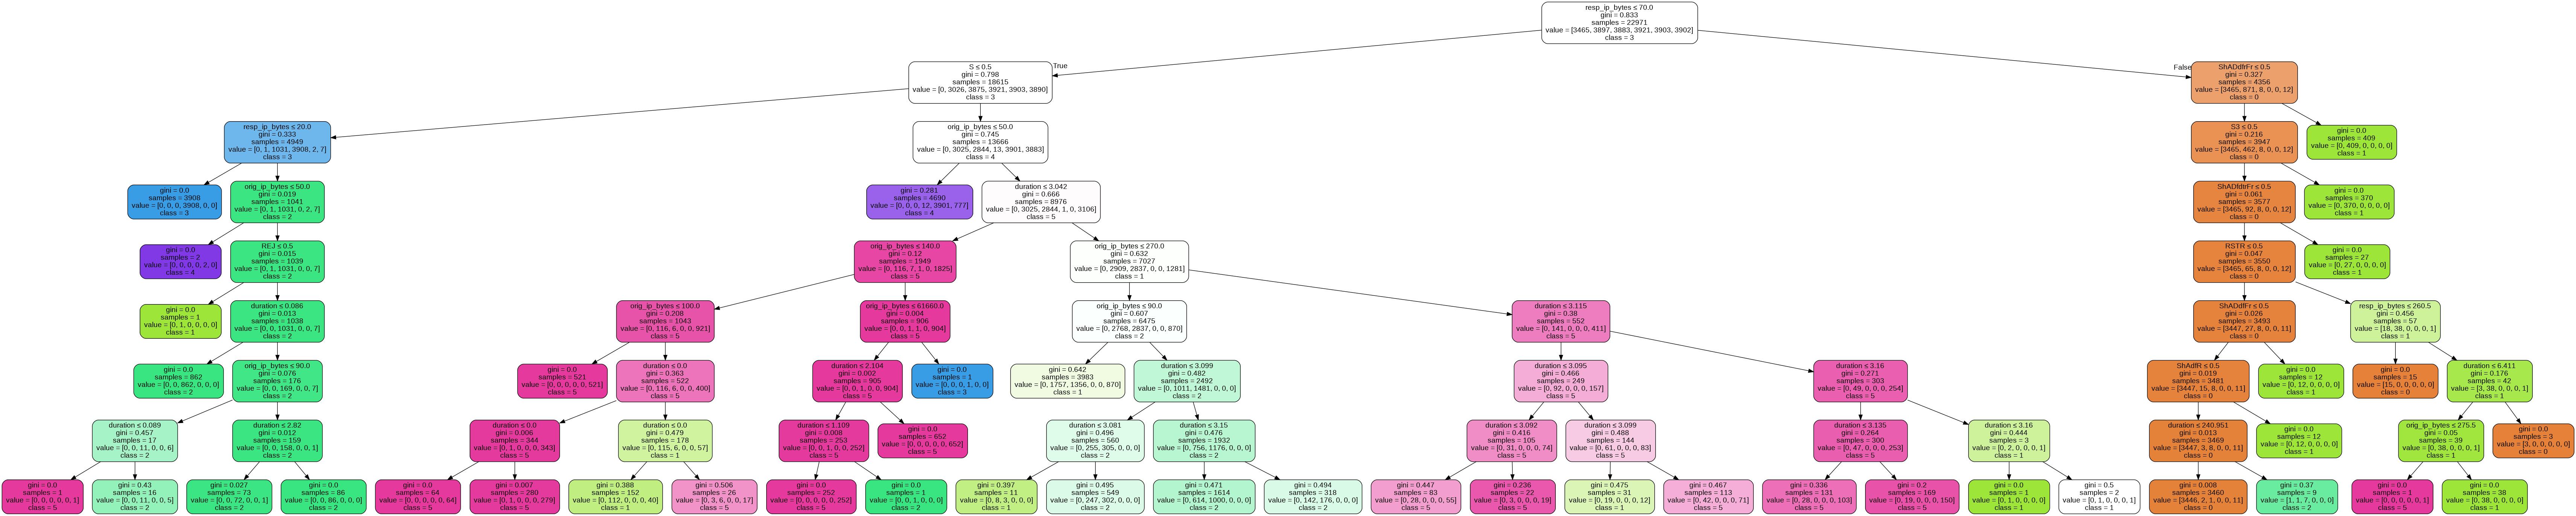

In [ ]:
# Visualizing the Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree_model_cart, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('/content/gdrive/My Drive/Colab Notebooks/Datasets/IoT_mal.png')
Image(graph.create_png())

###verify decision tree

In [ ]:
# accuracy on verification data 
#CART
dtree_pred = dtree_model_cart.predict(x_verify)
cal_accuracy(y_verify,dtree_pred) 


Accuracy :  80.93333333333334

Report : 
                            precision    recall  f1-score   support

                   Attack       0.99      1.00      1.00      4415
                      C&C       0.53      0.70      0.61      5105
            C&C-HeartBeat       0.70      0.63      0.67      5145
                     DDoS       1.00      1.00      1.00      5145
                    Okiru       0.83      1.00      0.91      5096
PartOfAHorizontalPortScan       0.94      0.55      0.70      5094

                 accuracy                           0.81     30000
                macro avg       0.83      0.81      0.81     30000
             weighted avg       0.83      0.81      0.81     30000



In [ ]:
# accuracy on verification data 
#ID3
dtree_pred2 = dtree_model_id3.predict(x_verify)
cal_accuracy(y_verify,dtree_pred2) 


Accuracy :  80.86

Report : 
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      4415
                      C&C       0.53      0.69      0.60      5105
            C&C-HeartBeat       0.70      0.64      0.67      5145
                     DDoS       1.00      1.00      1.00      5145
                    Okiru       0.83      1.00      0.91      5096
PartOfAHorizontalPortScan       0.94      0.55      0.69      5094

                 accuracy                           0.81     30000
                macro avg       0.83      0.81      0.81     30000
             weighted avg       0.83      0.81      0.81     30000



## Multinomial Logistic **Regression**


In [ ]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
mul_lr = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
mul_lr.fit(X_train, y_train)

In [ ]:
# accuracy on X_test 
Mul_predict = mul_lr.predict(X_test) 
cal_accuracy(y_test,Mul_predict)


Accuracy :  77.97318474664809

Report : 
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00       834
                      C&C       0.50      0.87      0.63       998
            C&C-HeartBeat       1.00      0.29      0.45       972
                     DDoS       1.00      0.99      1.00       934
                    Okiru       0.83      1.00      0.91      1001
PartOfAHorizontalPortScan       0.75      0.57      0.64      1004

                 accuracy                           0.78      5743
                macro avg       0.85      0.79      0.77      5743
             weighted avg       0.84      0.78      0.76      5743



###Verify multinomial logisctic reg

In [ ]:
# accuracy on verification sample 
Mul_pred = mul_lr.predict(x_verify) 
cal_accuracy(y_verify,Mul_pred)


Accuracy :  77.97666666666667

Report : 
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      4415
                      C&C       0.49      0.87      0.63      5105
            C&C-HeartBeat       1.00      0.28      0.44      5145
                     DDoS       1.00      1.00      1.00      5145
                    Okiru       0.83      1.00      0.91      5096
PartOfAHorizontalPortScan       0.74      0.57      0.64      5094

                 accuracy                           0.78     30000
                macro avg       0.84      0.78      0.77     30000
             weighted avg       0.84      0.78      0.76     30000



## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD

In [ ]:
final_mal.shape

(28714, 124)

In [ ]:
# encode class values as integers

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# encode class values as integers
encoded_Yt = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_yt = np_utils.to_categorical(encoded_Yt)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# encode class values as integers
encoded_Yv = encoder.transform(y_verify)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_yv = np_utils.to_categorical(encoded_Yv)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train= np.asarray(X_train)
X_test= np.asarray(X_test)
x_verify= np.asarray(x_verify)

In [ ]:
model = Sequential()
model.add(Dense(80, input_dim=123, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(80, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,dummy_y, validation_data=(X_test, dummy_yt), epochs=200, verbose=0)

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train,dummy_y, verbose=0)
_, test_acc = model.evaluate(X_test, dummy_yt, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.784, Test: 0.776


In [ ]:
_, test_acc = model.evaluate(x_verify, dummy_yv, verbose=0)
print('Accuracy on 2nd Sample : %.3f' % (test_acc))

Accuracy on 2nd Sample : 0.776


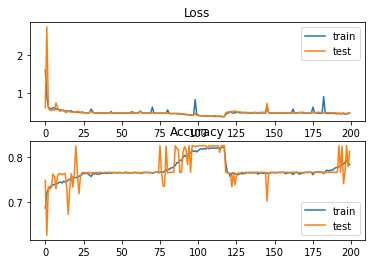

In [ ]:
# plot loss during training
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
